In [1]:
# Target client ID
target_client_id = "0"

# Federated Learning

In [2]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the path to the results file
file_path = "../src/plots/federated_learning/mnist_resnet18_results.json"

with open(file_path, "r") as file:
    data = json.load(file)

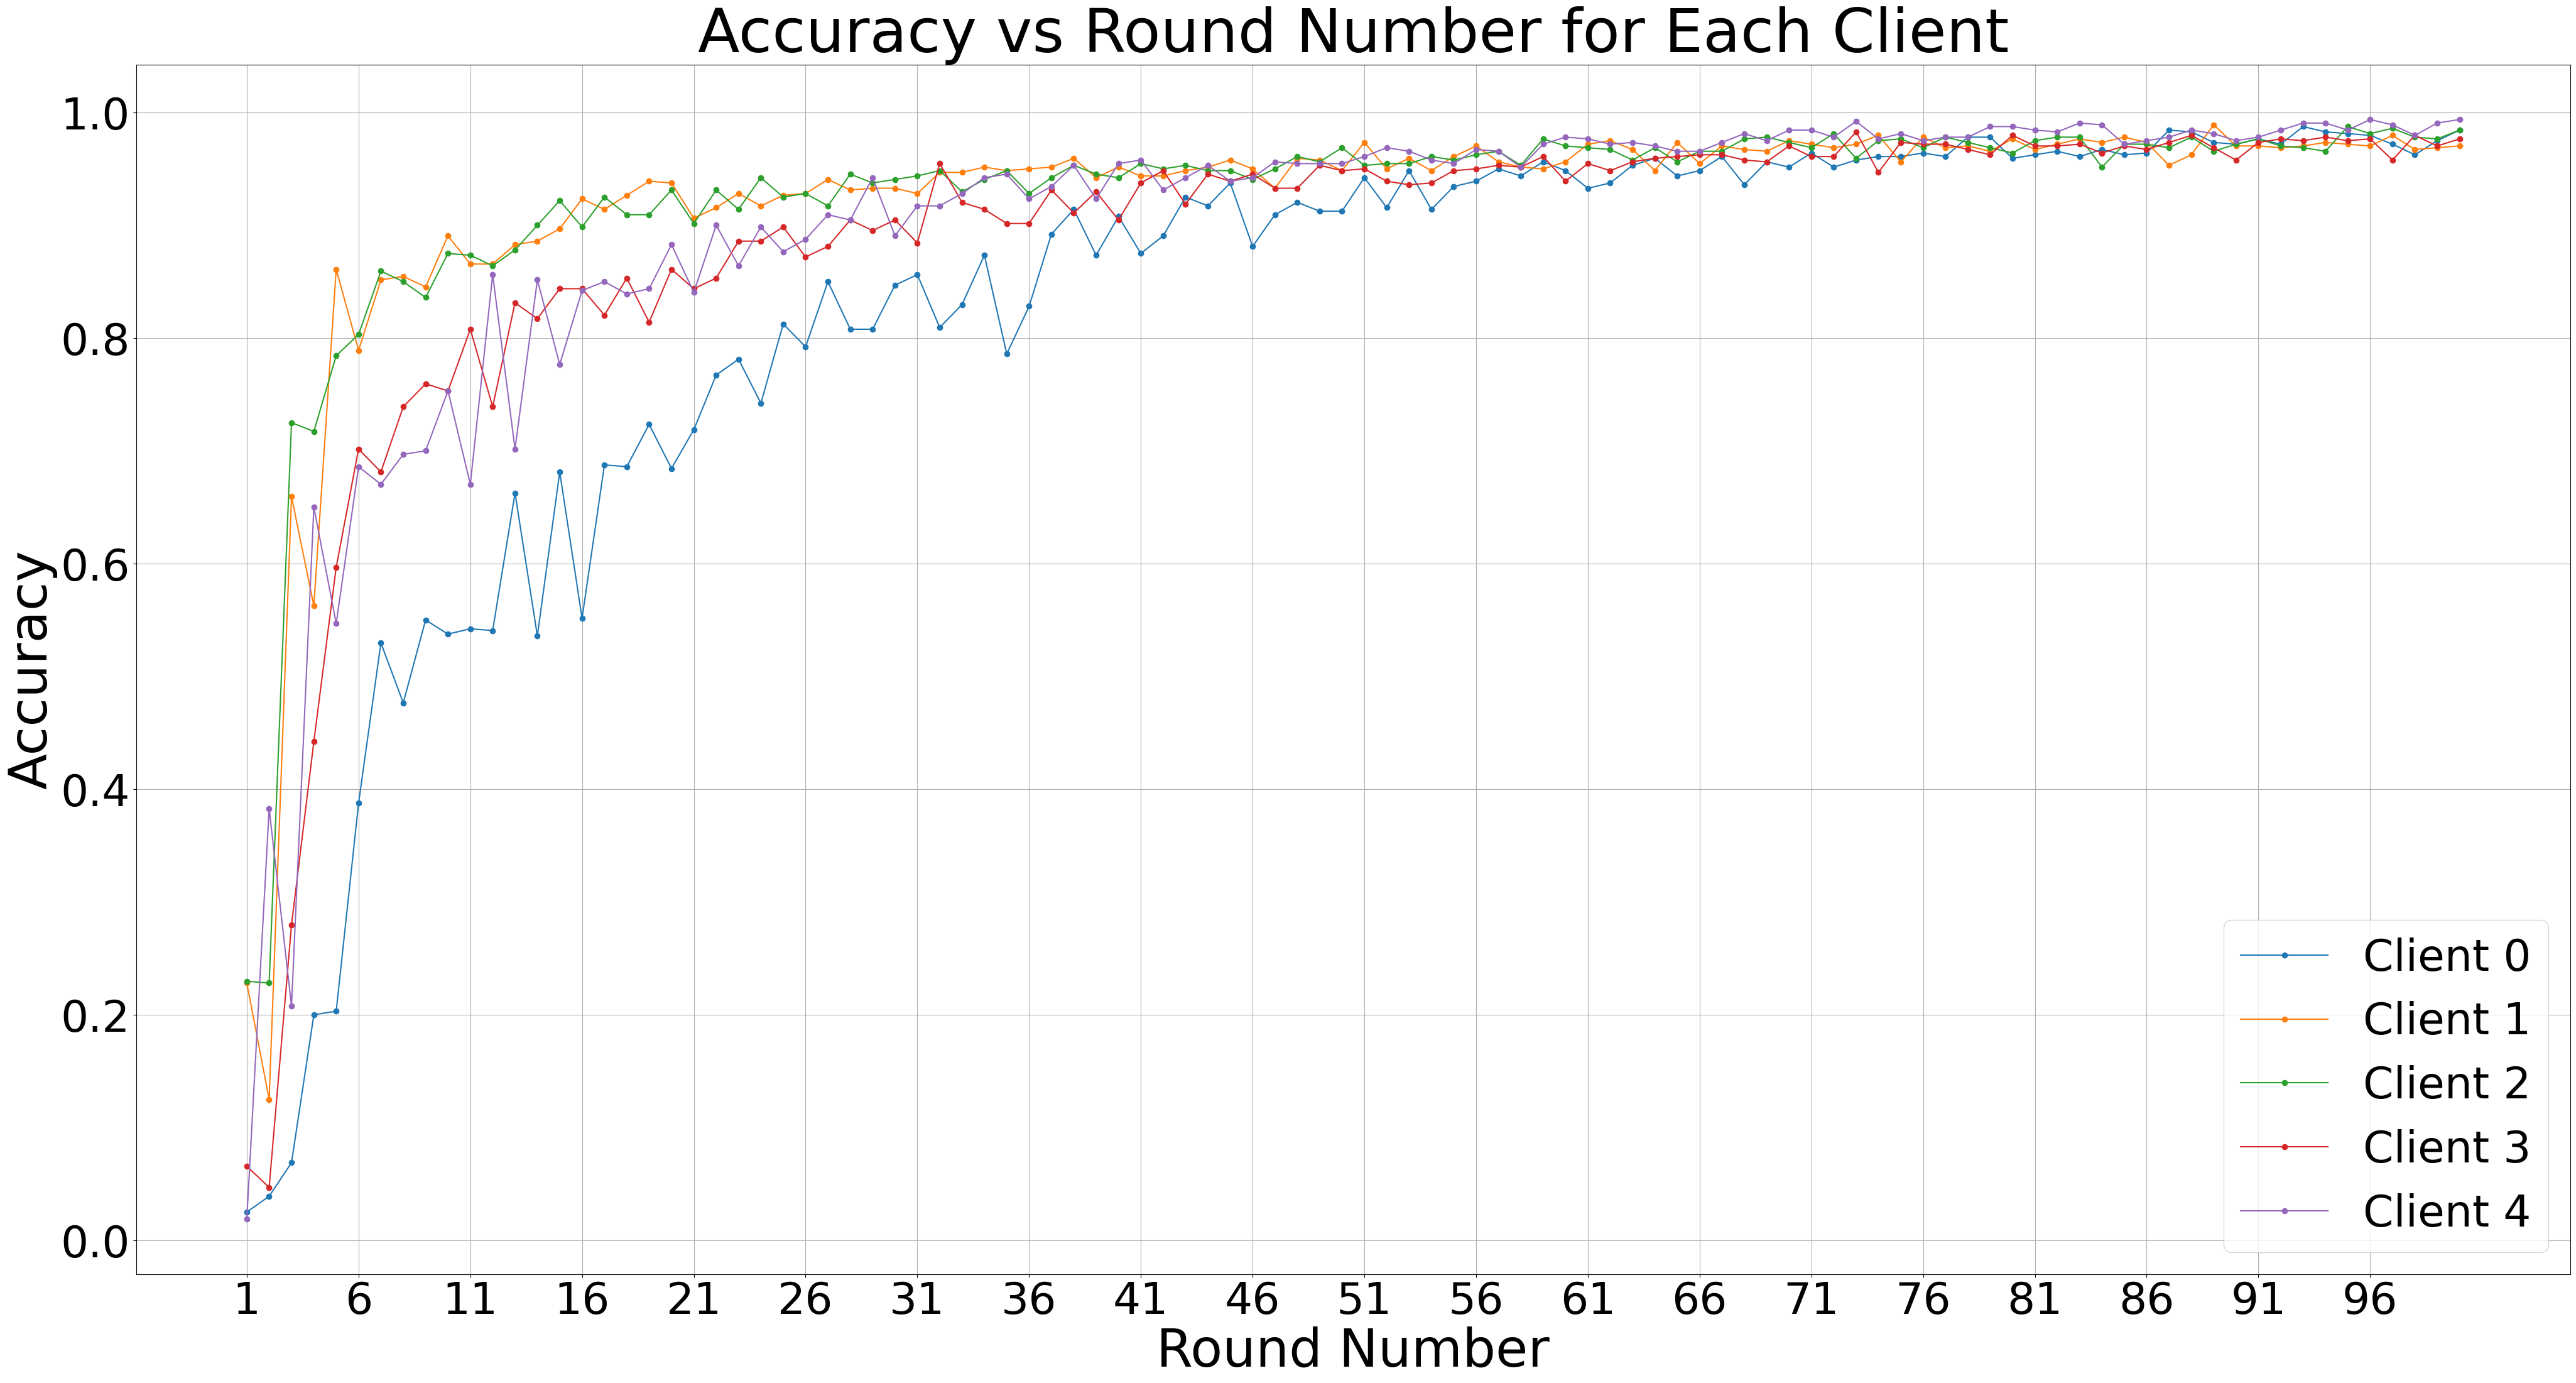

In [3]:
# Plotting
plt.figure(figsize=(50, 25))

# Sort client IDs
sorted_client_ids = sorted(data.keys())

for client_id in sorted_client_ids:
    rounds = data[client_id]
    round_numbers = []
    accuracies = []
    for round_num, metrics in rounds.items():
        round_num = int(round_num)
        round_numbers.append(round_num)  # Convert round number to integer
        accuracies.append(metrics["metrics"]["accuracy"])

    # Sort rounds and accuracies based on round numbers
    round_numbers, accuracies = zip(*sorted(zip(round_numbers, accuracies)))

    plt.plot(round_numbers, accuracies, marker="o", label=f"Client {client_id}")

plt.xlabel("Round Number", fontsize=60)
plt.ylabel("Accuracy", fontsize=60)
plt.title("Accuracy vs Round Number for Each Client", fontsize=70)
plt.xticks(
    range(1, max(round_numbers) + 1, 5), fontsize=50
)  # Ensure x-axis starts from 1 and increments by 5
plt.legend(fontsize=50, loc="lower right")  # Move legend to bottom right
plt.yticks(fontsize=50)
plt.grid(True)
plt.show()

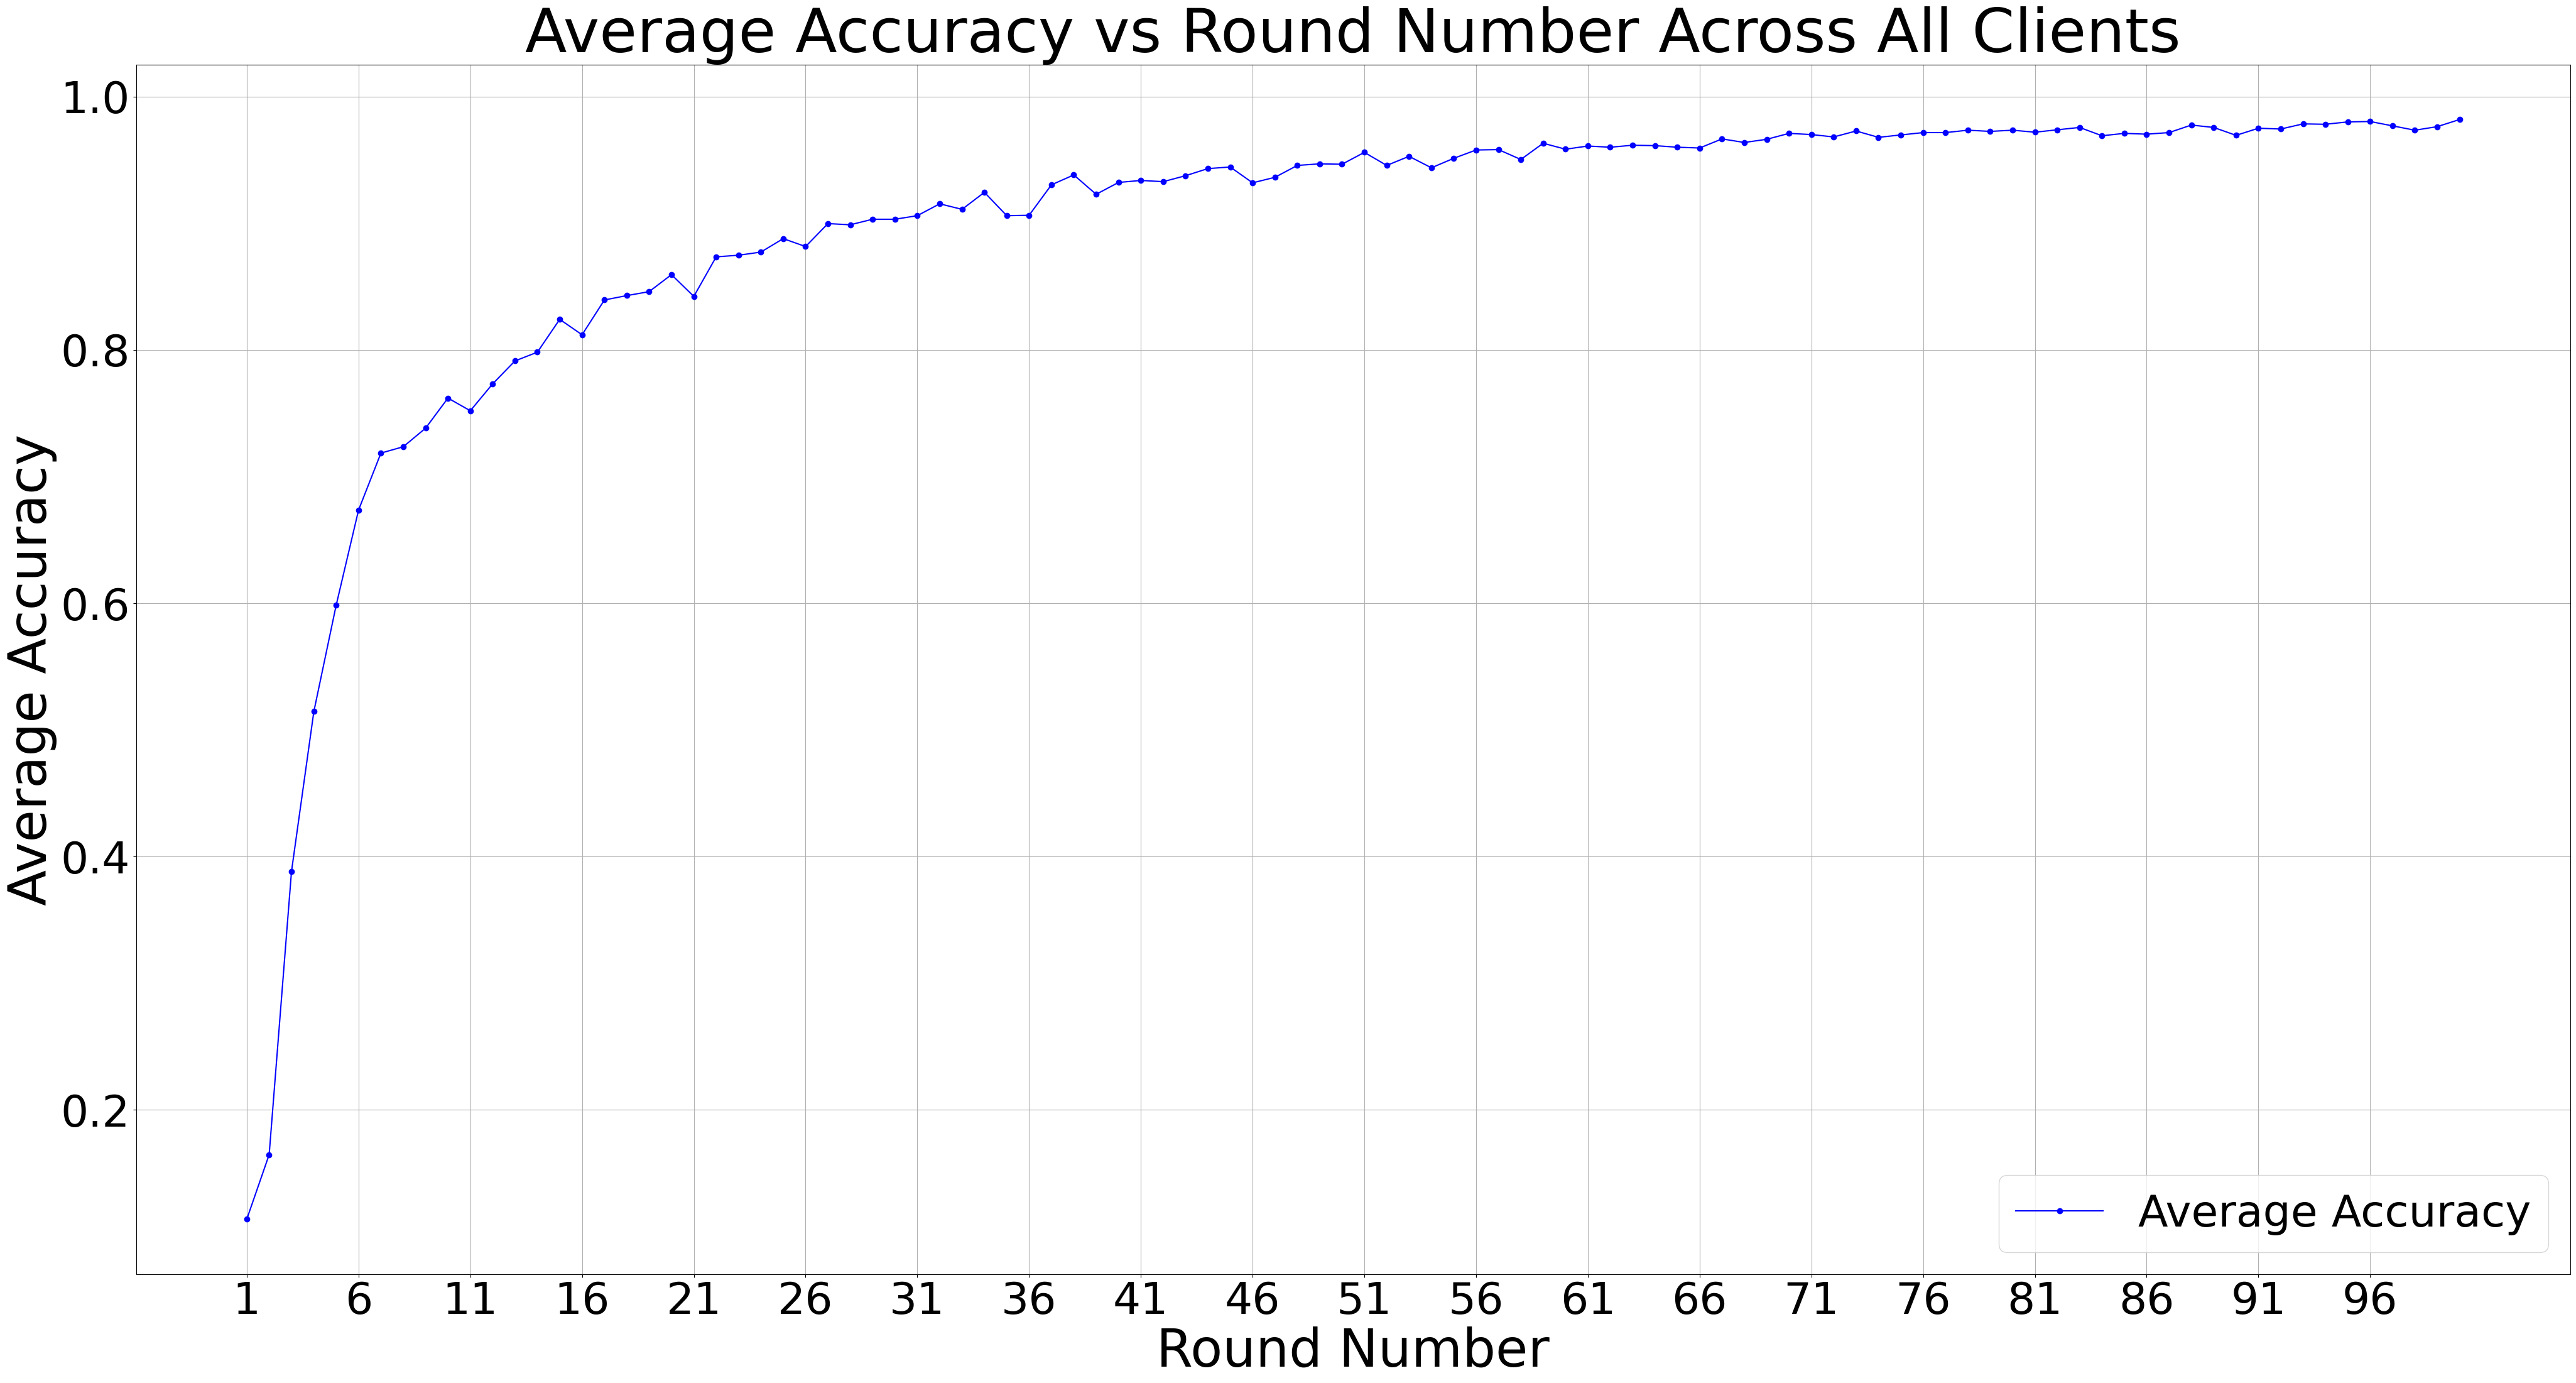

Average accuracy at the last round: 0.9818749999999999


In [4]:
# Calculate average accuracy for each round
round_accuracy = defaultdict(list)

for client_id, rounds in data.items():
    for round_num, metrics in rounds.items():
        round_accuracy[int(round_num)].append(metrics["metrics"]["accuracy"])

# Calculate the average accuracy for each round
average_accuracy = {}
for round_num, accuracies in round_accuracy.items():
    average_accuracy[round_num] = sum(accuracies) / len(accuracies)

# Sort rounds and average accuracies
sorted_rounds = sorted(average_accuracy.keys())
sorted_avg_accuracies = [average_accuracy[round_num] for round_num in sorted_rounds]

# Plotting
plt.figure(figsize=(50, 25))
plt.plot(
    sorted_rounds,
    sorted_avg_accuracies,
    marker="o",
    linestyle="-",
    color="b",
    label="Average Accuracy",
)

plt.xlabel("Round Number", fontsize=60)
plt.ylabel("Average Accuracy", fontsize=60)
plt.title("Average Accuracy vs Round Number Across All Clients", fontsize=70)
plt.xticks(
    range(1, max(sorted_rounds) + 1, 5), fontsize=50
)  # Ensure x-axis starts from 1 and increments by 3
plt.yticks(fontsize=50)
plt.legend(fontsize=50, loc="lower right")  # Move legend to bottom right
plt.grid(True)
plt.show()

last_round_avg_accuracy = sorted_avg_accuracies[-1]
print(f"Average accuracy at the last round: {last_round_avg_accuracy}")

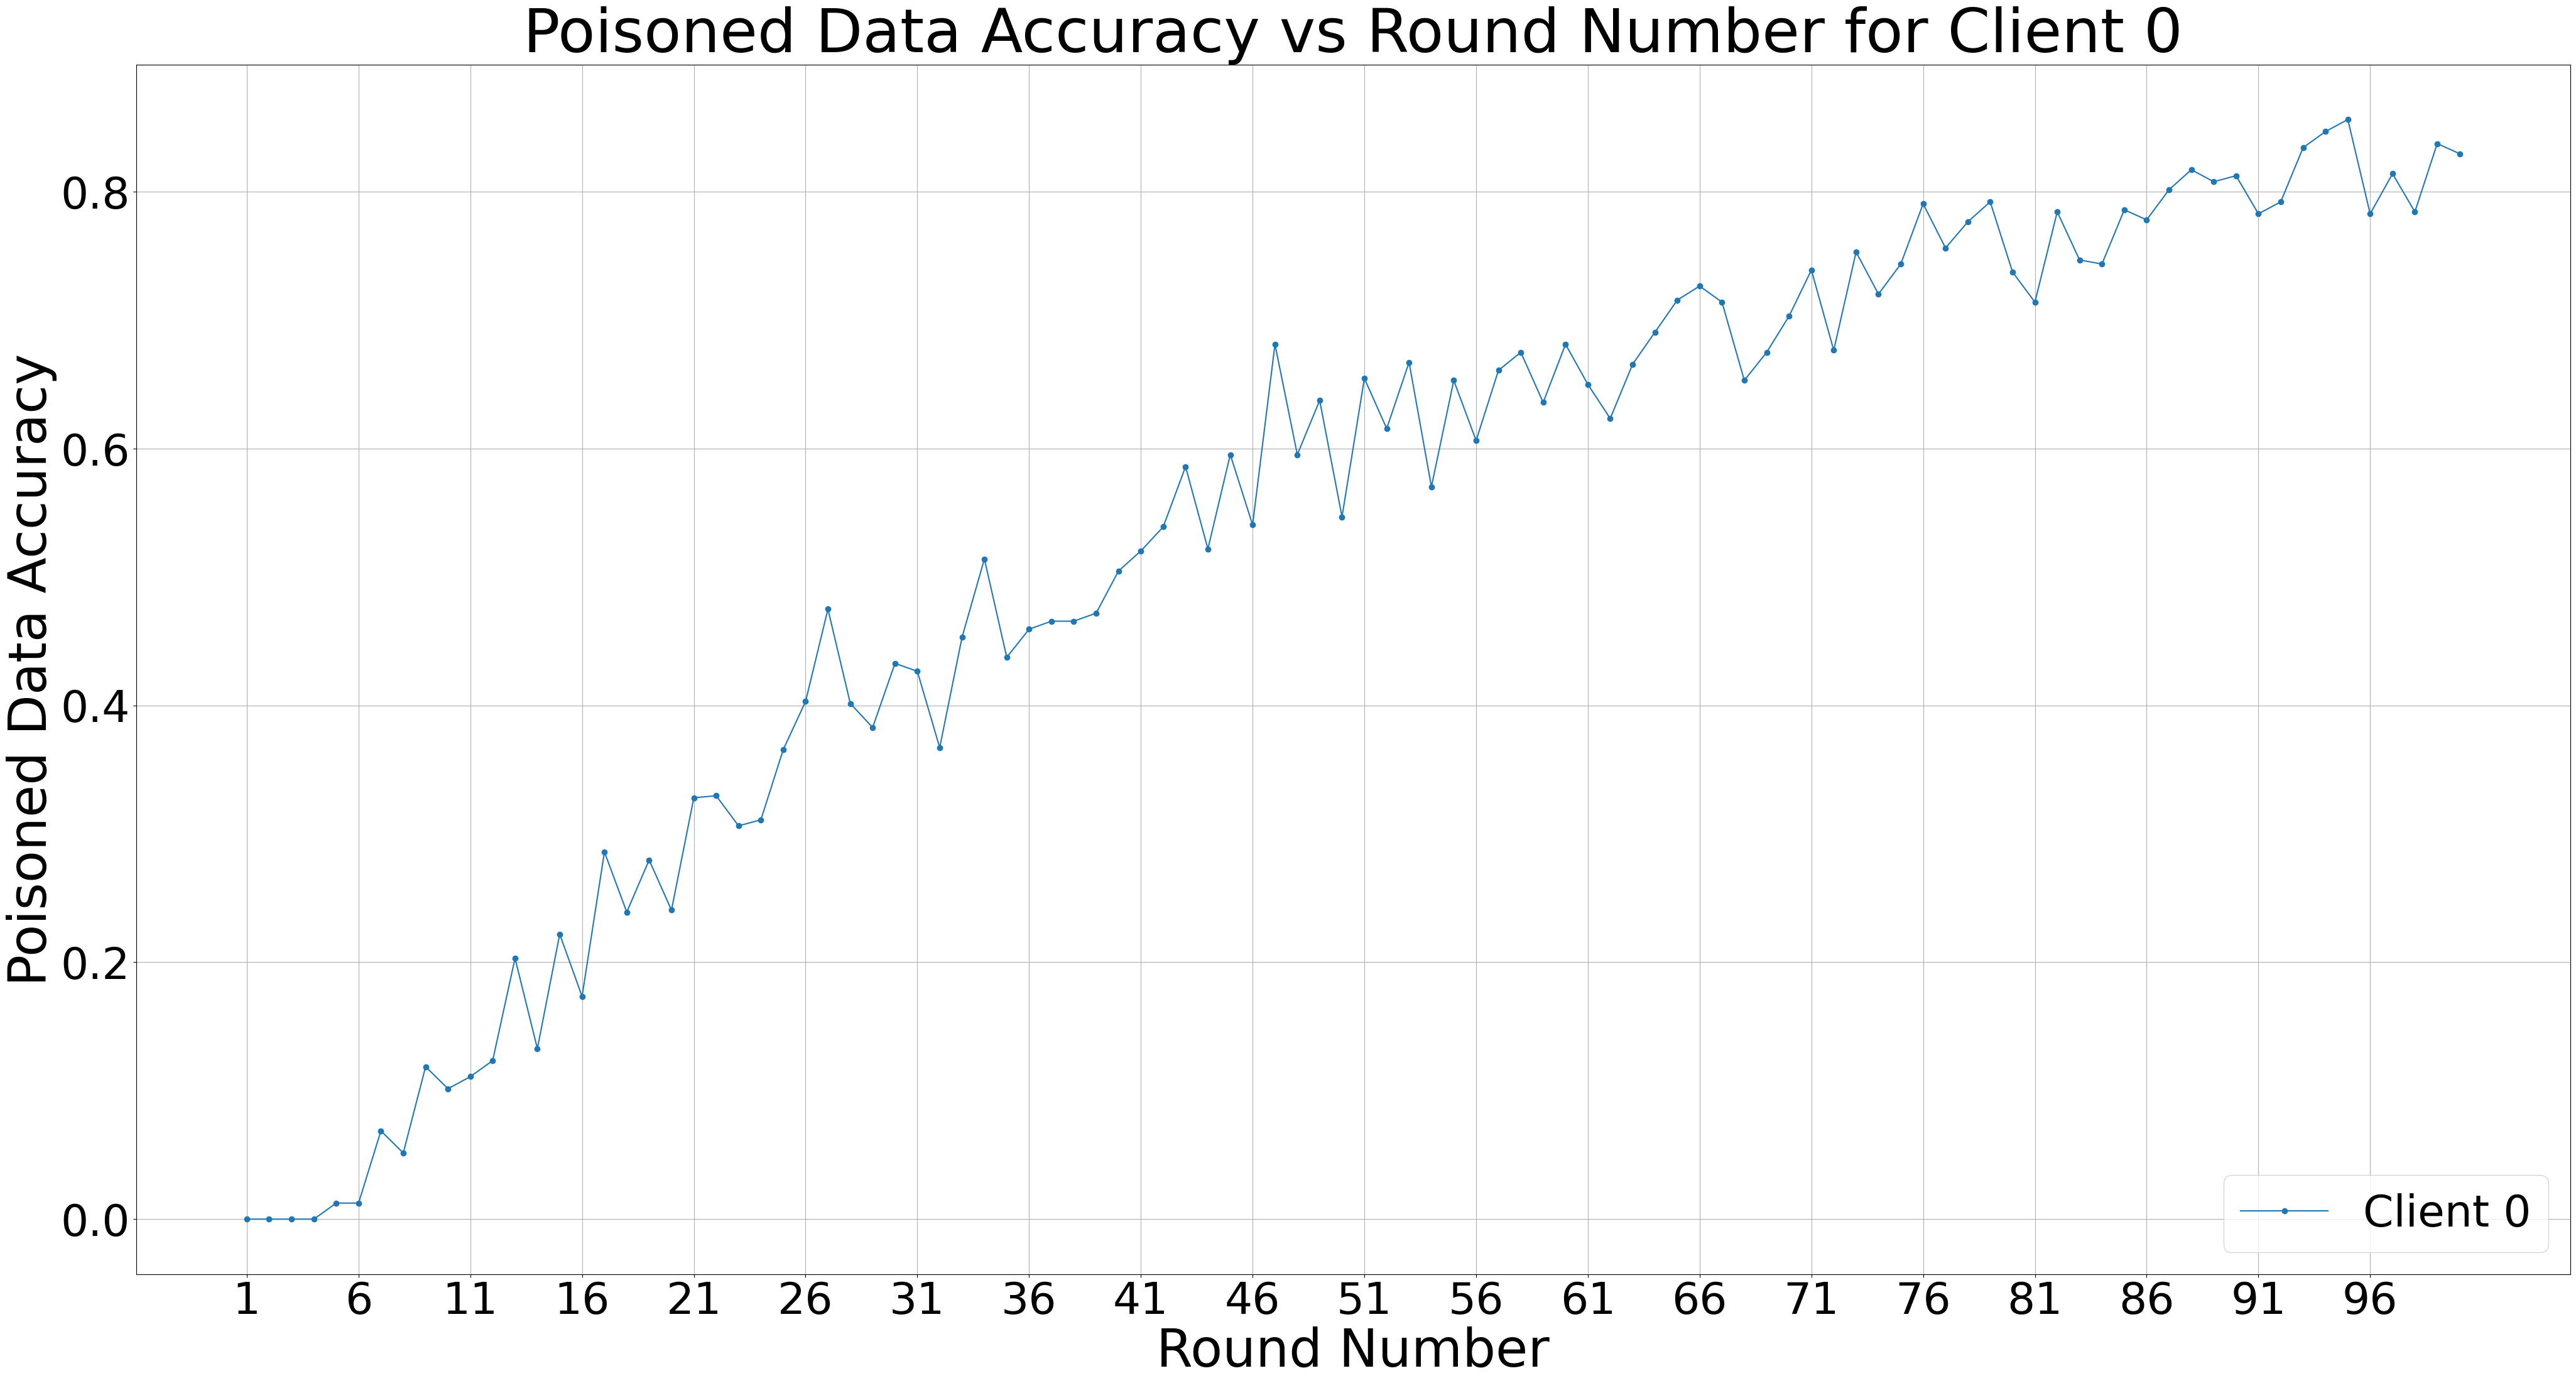

Poisoned Data Accuracy at the last round: 0.8296875


In [5]:
# Plotting
plt.figure(figsize=(50, 25))

# Extract data for the target client
rounds = data[target_client_id]
round_numbers = []
poisoned_accuracies = []
for round_num, metrics in rounds.items():
    round_num = int(round_num)
    round_numbers.append(round_num)  # Convert round number to integer
    poisoned_accuracies.append(metrics["metrics"]["poisoned_data_accuracy"])

# Sort rounds and accuracies based on round numbers
round_numbers, poisoned_accuracies = zip(
    *sorted(zip(round_numbers, poisoned_accuracies))
)

# Plot the data for the target client
plt.plot(
    round_numbers, poisoned_accuracies, marker="o", label=f"Client {target_client_id}"
)

plt.xlabel("Round Number", fontsize=60)
plt.ylabel("Poisoned Data Accuracy", fontsize=60)
plt.title("Poisoned Data Accuracy vs Round Number for Client 0", fontsize=70)
plt.xticks(
    range(1, max(round_numbers) + 1, 5), fontsize=50
)  # Ensure x-axis starts from 1 and increments by 5
plt.legend(fontsize=50, loc="lower right")  # Move legend to bottom right
plt.yticks(fontsize=50)
plt.grid(True)
plt.show()

# Save poisoned_data_accuracy at the last round
last_round_poisoned_accuracy = poisoned_accuracies[-1]
print(f"Poisoned Data Accuracy at the last round: {last_round_poisoned_accuracy}")

# Federated Unlearning

In [6]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the path to the results file
file_path = "../src/plots/federated_unlearning/mnist_resnet18_results.json"

with open(file_path, "r") as file:
    unlearning_data = json.load(file)

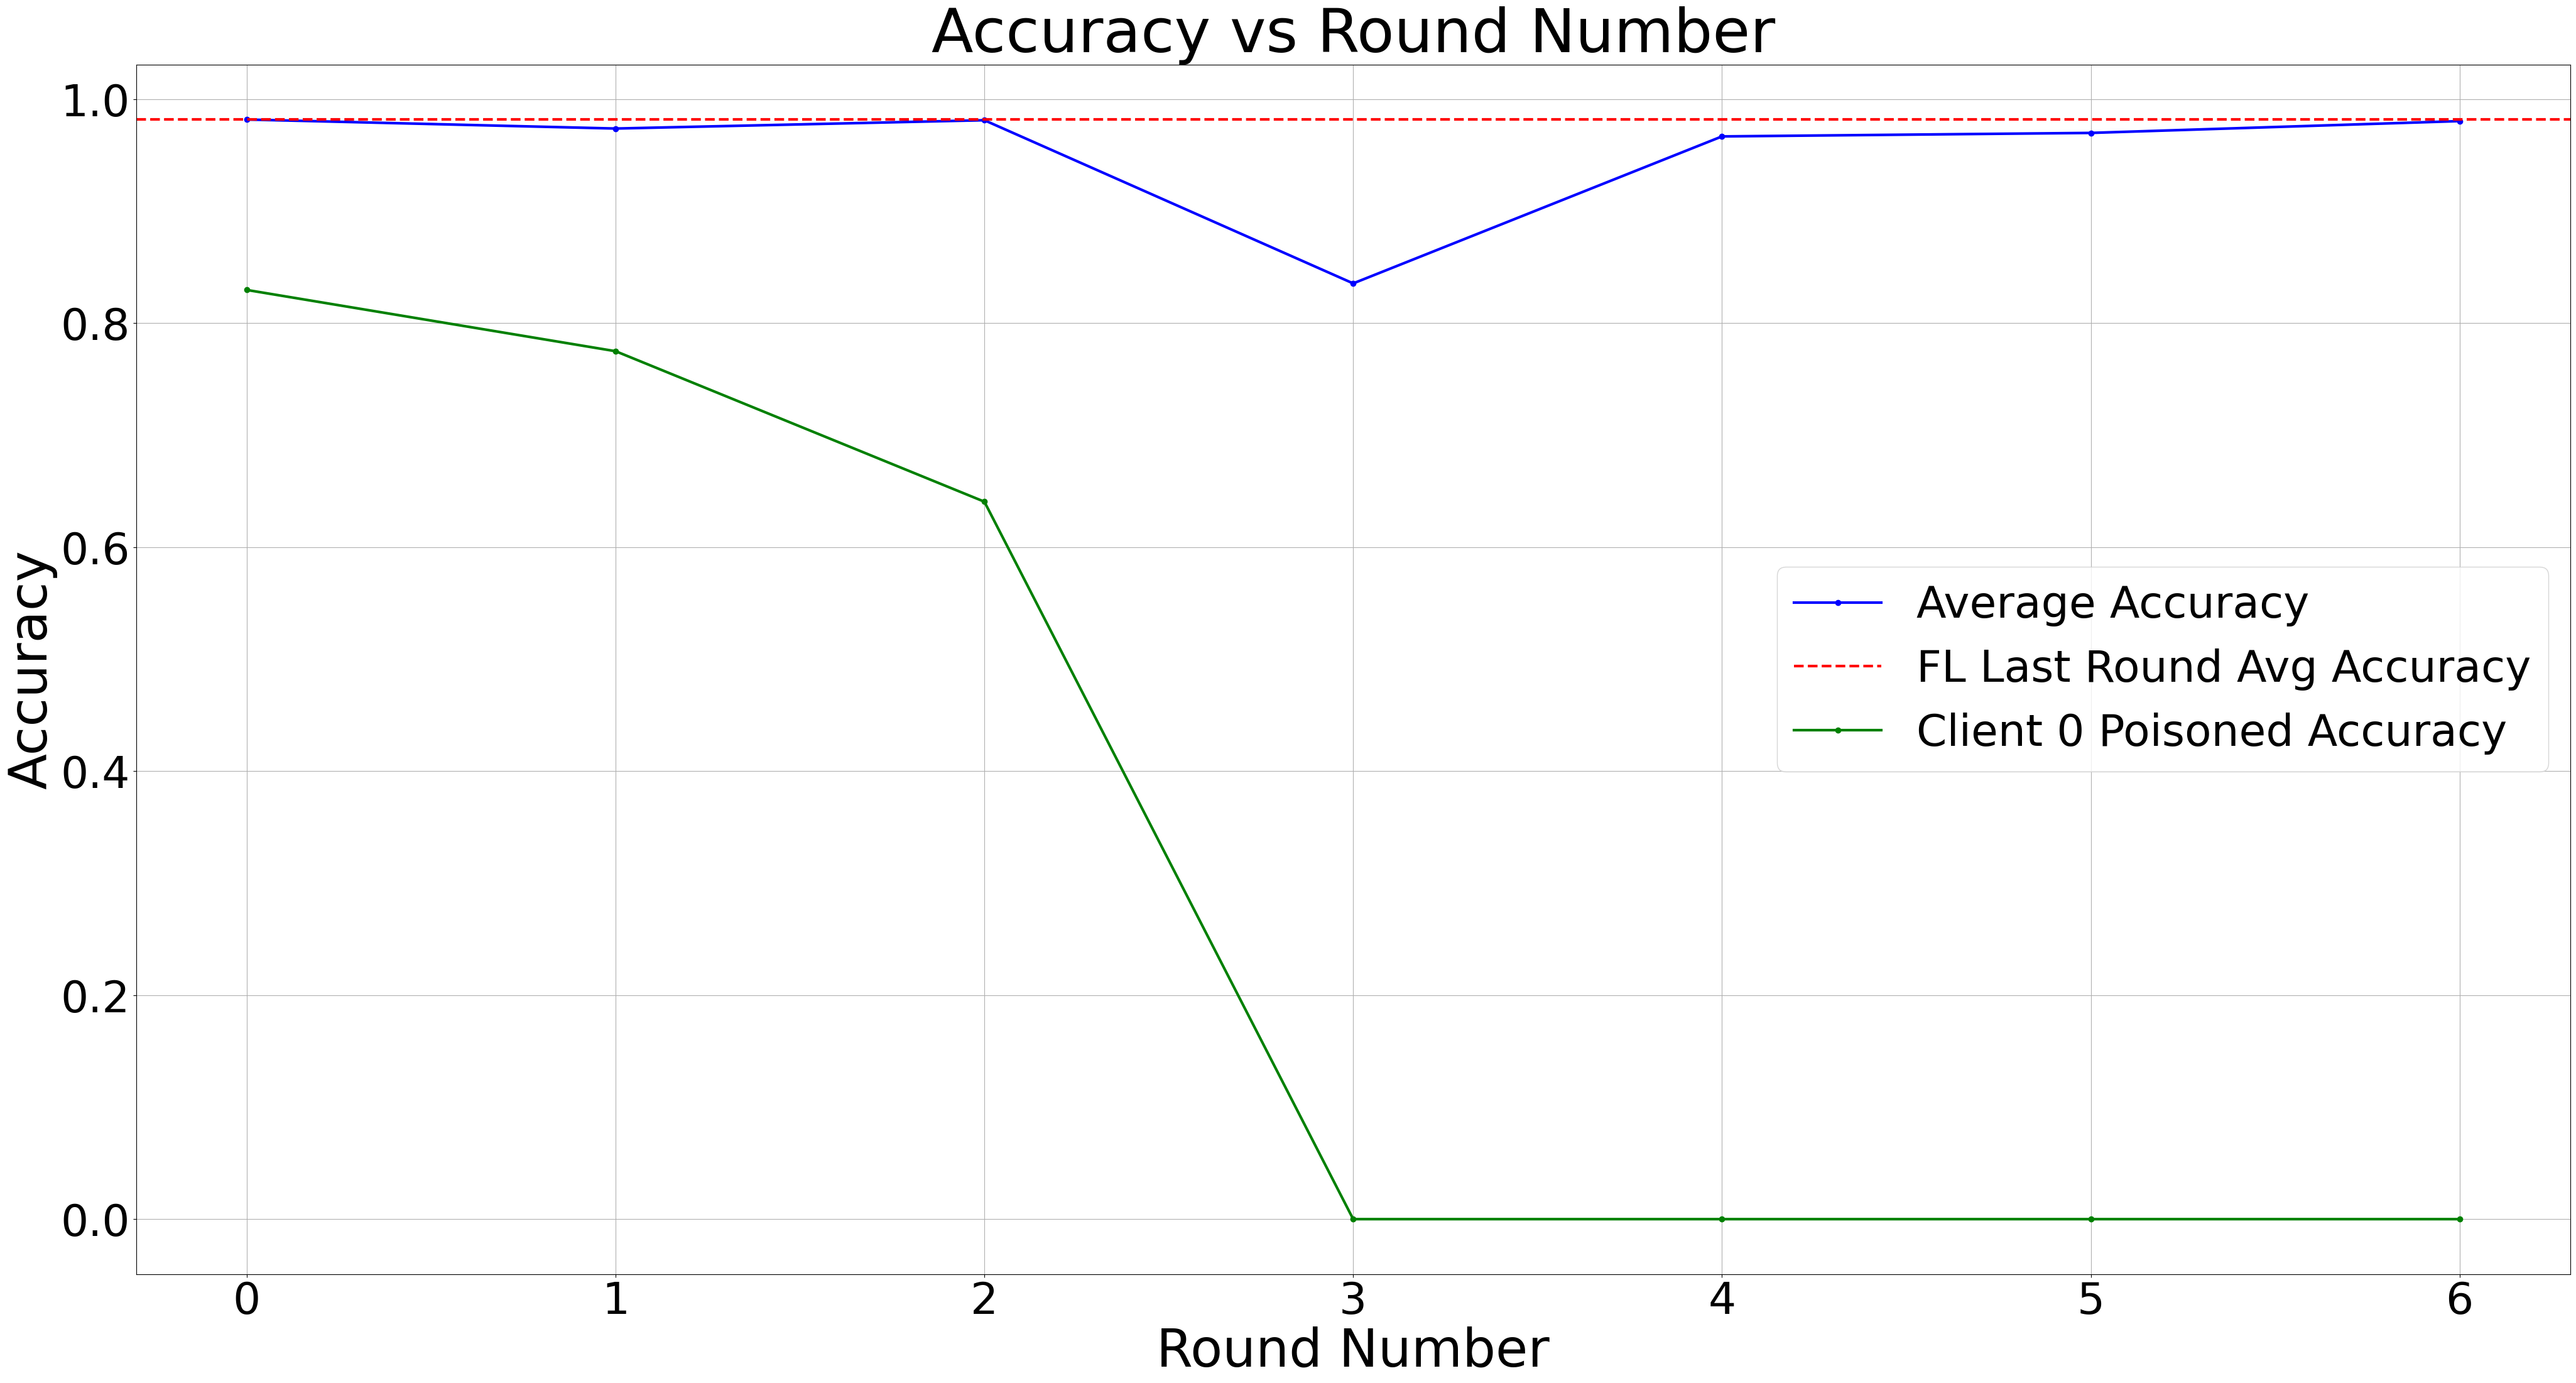

Poisoned Data Accuracy at the last round: 0.0


In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Calculate average accuracy for each round (excluding target client)
round_accuracy = defaultdict(list)
for client_id, rounds in unlearning_data.items():
    if client_id == target_client_id:
        continue  # Skip the target client ID
    for round_num, metrics in rounds.items():
        round_accuracy[int(round_num)].append(metrics["metrics"]["accuracy"])

# Compute the average accuracy per round
average_accuracy = {}
for round_num, accuracies in round_accuracy.items():
    average_accuracy[round_num] = sum(accuracies) / len(accuracies)

# Sort rounds and corresponding average accuracies; add round 0
sorted_rounds = sorted(average_accuracy.keys())
sorted_avg_accuracies = [average_accuracy[round_num] for round_num in sorted_rounds]
sorted_rounds.insert(0, 0)
sorted_avg_accuracies.insert(0, last_round_avg_accuracy)

# Extract target client's data for poisoned data accuracy
target_rounds = unlearning_data[target_client_id]
target_round_numbers = []
poisoned_accuracies = []
for round_num, metrics in target_rounds.items():
    round_int = int(round_num)
    target_round_numbers.append(round_int)
    poisoned_accuracies.append(metrics["metrics"]["poisoned_data_accuracy"])

# Sort target client data by round number; add round 0 data
target_round_numbers, poisoned_accuracies = zip(
    *sorted(zip(target_round_numbers, poisoned_accuracies))
)
target_round_numbers = (0,) + target_round_numbers
poisoned_accuracies = (last_round_poisoned_accuracy,) + poisoned_accuracies

# Determine the maximum round number for consistent x-axis scaling
max_round = max(max(sorted_rounds), max(target_round_numbers))

# Create one figure for both plots
plt.figure(figsize=(50, 25))

# Plot the average accuracy curve
plt.plot(
    sorted_rounds,
    sorted_avg_accuracies,
    marker="o",
    linestyle="-",
    color="b",
    linewidth=3,  # Set line width to make it bold
    label="Average Accuracy",
)

# Plot the horizontal line for FL last round average accuracy
plt.axhline(
    y=last_round_avg_accuracy,
    color="r",
    linestyle="--",
    linewidth=3,  # Set line width to make it bold
    label="FL Last Round Avg Accuracy",
)

# Plot the target client's poisoned data accuracy
plt.plot(
    target_round_numbers,
    poisoned_accuracies,
    marker="o",
    linestyle="-",
    color="g",
    linewidth=3,  # Set line width to make it bold
    label=f"Client {target_client_id} Poisoned Accuracy",
)

# Set labels and title
plt.xlabel("Round Number", fontsize=60)
plt.ylabel("Accuracy", fontsize=60)
plt.title("Accuracy vs Round Number", fontsize=70)

# Set x-ticks to cover all rounds
plt.xticks(range(0, max_round + 1, 1), fontsize=50)
plt.yticks(fontsize=50)

# Add legend and grid
plt.legend(fontsize=50, loc="center right")
plt.grid(True)
plt.show()

# Print the last round poisoned accuracy for the target client
print(f"Poisoned Data Accuracy at the last round: {poisoned_accuracies[-1]}")

# Retraining

In [8]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the path to the results file
file_path = "../src/plots/retraining/mnist_resnet18_results.json"

with open(file_path, "r") as file:
    retraining_data = json.load(file)

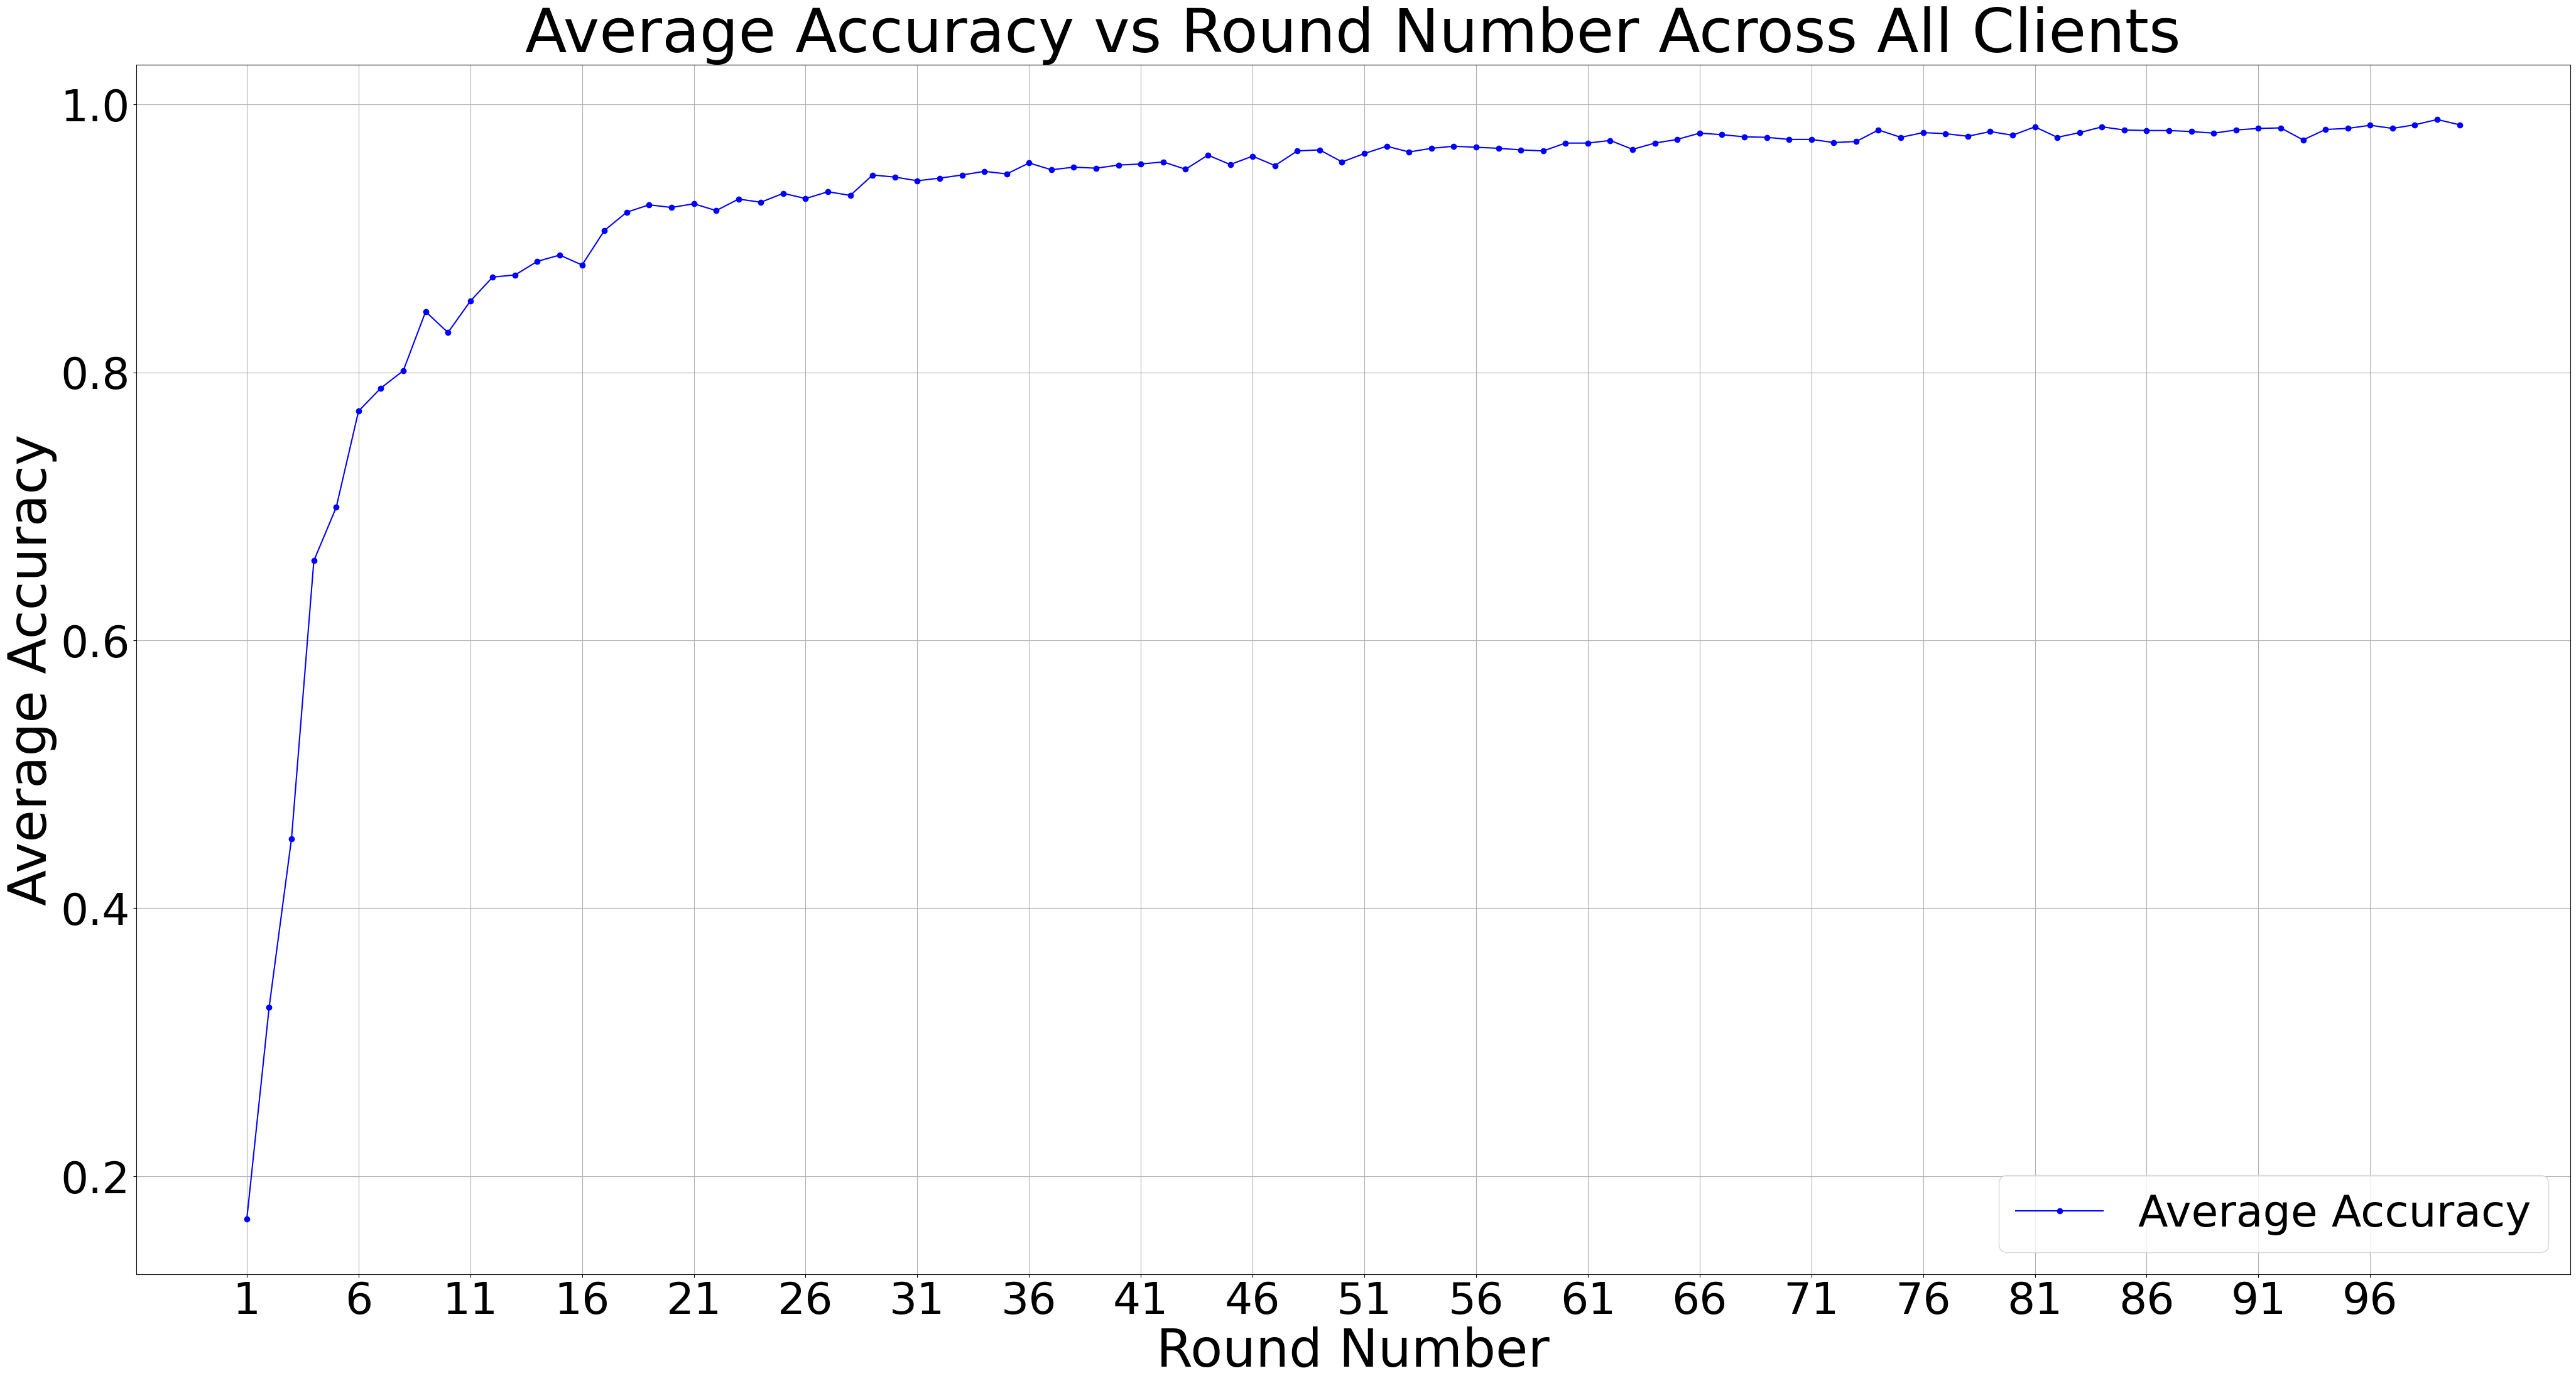

Average accuracy at the last round: 0.9847656250000001


In [9]:
# Calculate average accuracy for each round
round_accuracy = defaultdict(list)

for client_id, rounds in retraining_data.items():
    if client_id == target_client_id:
        continue  # Skip the target client ID
    for round_num, metrics in rounds.items():
        round_accuracy[int(round_num)].append(metrics["metrics"]["accuracy"])

# Calculate the average accuracy for each round
average_accuracy = {}
for round_num, accuracies in round_accuracy.items():
    average_accuracy[round_num] = sum(accuracies) / len(accuracies)

# Sort rounds and average accuracies
sorted_rounds = sorted(average_accuracy.keys())
sorted_avg_accuracies = [average_accuracy[round_num] for round_num in sorted_rounds]

# Plotting
plt.figure(figsize=(50, 25))
plt.plot(
    sorted_rounds,
    sorted_avg_accuracies,
    marker="o",
    linestyle="-",
    color="b",
    label="Average Accuracy",
)

plt.xlabel("Round Number", fontsize=60)
plt.ylabel("Average Accuracy", fontsize=60)
plt.title("Average Accuracy vs Round Number Across All Clients", fontsize=70)
plt.xticks(
    range(1, max(sorted_rounds) + 1, 5), fontsize=50
)  # Ensure x-axis starts from 1 and increments by 3
plt.yticks(fontsize=50)
plt.legend(fontsize=50, loc="lower right")  # Move legend to bottom right
plt.grid(True)
plt.show()

last_round_avg_accuracy = sorted_avg_accuracies[-1]
print(f"Average accuracy at the last round: {last_round_avg_accuracy}")

In [10]:
ola = [(round_num, average_accuracy[round_num]) for round_num in sorted_rounds[75:100]]
ola

[(76, 0.9789062500000001),
 (77, 0.9781249999999999),
 (78, 0.976171875),
 (79, 0.9796875),
 (80, 0.976953125),
 (81, 0.983203125),
 (82, 0.975390625),
 (83, 0.97890625),
 (84, 0.983203125),
 (85, 0.9808593750000001),
 (86, 0.98046875),
 (87, 0.98046875),
 (88, 0.9796874999999999),
 (89, 0.978515625),
 (90, 0.9808593749999999),
 (91, 0.9820312500000001),
 (92, 0.982421875),
 (93, 0.9734375),
 (94, 0.9812500000000001),
 (95, 0.98203125),
 (96, 0.984375),
 (97, 0.98203125),
 (98, 0.9847656250000001),
 (99, 0.988671875),
 (100, 0.9847656250000001)]